In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into a pandas data frame
airline_df = pd.read_csv(r"C:\Users\chinm\OneDrive\Desktop\Data\Data_Train.csv")
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
airline_df.shape

(10683, 11)

In [4]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
airline_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
airline_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
airline_df[airline_df['Route'].isnull() | airline_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
airline_df.dropna(inplace = True)

In [9]:
airline_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
airline_df.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

# Expolatory data analysis

Encoding

In [13]:
#Duration
def encode_duration(Duration):
    if len(Duration.split()) == 2:
        hours = int(Duration.split()[0][:-1])
        minutes = int(Duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(Duration[:-1]) * 60

In [14]:
airline_df['Duration'] = airline_df['Duration'].apply(encode_duration)
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [15]:
#Total Stops
airline_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
#Using maping method available in pandas
airline_df['Total_Stops'] = airline_df['Total_Stops'].map({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
})

In [17]:
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


In [18]:
#Additional Info
airline_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [19]:
airline_df.drop('Additional_Info', axis=1, inplace=True)
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,13302


In [20]:
#Departure Time and Arrival Time
airline_df['Dep_Time'] = pd.to_datetime(airline_df['Dep_Time'])
airline_df['Arrival_Time'] = pd.to_datetime(airline_df['Arrival_Time'])
airline_df.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                 int64
Price                       int64
dtype: object

In [21]:
airline_df['Dep_Time_in_hours'] = airline_df['Dep_Time'].dt.hour
airline_df['Dep_Time_in_minutes'] = airline_df['Dep_Time'].dt.minute
airline_df['Arrival_Time_in_hours'] = airline_df['Arrival_Time'].dt.hour
airline_df['Arrival_Time_in_minutes'] = airline_df['Arrival_Time'].dt.minute

In [22]:
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-10-30 22:20:00,2024-03-22 01:10:00,170,0,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-30 05:50:00,2024-10-30 13:15:00,445,2,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-30 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-10-30 18:05:00,2024-10-30 23:30:00,325,1,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-10-30 16:50:00,2024-10-30 21:35:00,285,1,13302,16,50,21,35


In [23]:
#Dropping the daparture time and arrival time (as we no longer need them)
airline_df.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35


In [24]:
#Date of journey
airline_df['Date_of_Journey'] = pd.to_datetime(airline_df['Date_of_Journey'])
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35


In [25]:
#To find the unique values
airline_df['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [26]:
airline_df['Day'] = airline_df['Date_of_Journey'].dt.day
airline_df['Month'] = airline_df['Date_of_Journey'].dt.month
airline_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1


In [27]:
airline_df.drop('Date_of_Journey', axis=1, inplace=True)
airline_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1


In [28]:
airline_df.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
airline_df['Airline'] = label_encoder.fit_transform(airline_df['Airline'])
airline_df['Source'] = label_encoder.fit_transform(airline_df['Source'])
airline_df['Destination'] = label_encoder.fit_transform(airline_df['Destination'])
airline_df['Route'] = label_encoder.fit_transform(airline_df['Route'])

airline_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,3,0,5,18,170,0,3897,22,20,1,10,24,3
1,1,3,0,84,445,2,7662,5,50,13,15,5,1
2,4,2,1,118,1140,2,13882,9,25,4,25,6,9
3,3,3,0,91,325,1,6218,18,5,23,30,5,12
4,3,0,5,29,285,1,13302,16,50,21,35,3,1


Separating or splitting features and the target


In [31]:
X = airline_df.drop(['Price'], axis =1)

Y = airline_df['Price']


In [32]:
print(X)

       Airline  Source  Destination  Route  Duration  Total_Stops  \
0            3       0            5     18       170            0   
1            1       3            0     84       445            2   
2            4       2            1    118      1140            2   
3            3       3            0     91       325            1   
4            3       0            5     29       285            1   
...        ...     ...          ...    ...       ...          ...   
10678        0       3            0     64       150            0   
10679        1       3            0     64       155            0   
10680        4       0            2     18       180            0   
10681       10       0            5     18       160            0   
10682        1       2            1    108       500            2   

       Dep_Time_in_hours  Dep_Time_in_minutes  Arrival_Time_in_hours  \
0                     22                   20                      1   
1                      5   

In [33]:
print(Y)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64


In [34]:
# Splitting the data into training data and testing data

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [35]:
print(X.shape, x_train.shape, x_test.shape)

(10682, 12) (7477, 12) (3205, 12)


Model Training

In [37]:
#LINEAR REGRESSION

# loading the linear regression model
linreg_model = LinearRegression()

In [38]:
linreg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [40]:
# Prediction on training data
training_data_pred = linreg_model.predict(x_train)

In [41]:
# R sqaure error
error_score = metrics.r2_score(y_train, training_data_pred)
print("R squared Error :", error_score)

R squared Error : 0.4188616730698663


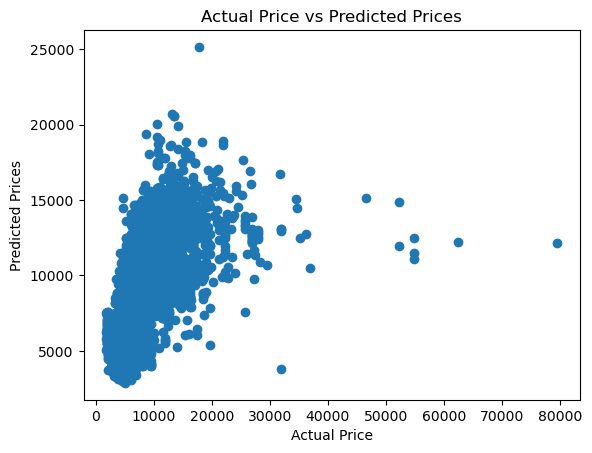

In [42]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [43]:
# Prediction on testing data
testing_data_pred = linreg_model.predict(x_test)

In [44]:
# R sqaure error
error_score = metrics.r2_score(y_test, testing_data_pred)
print("R squared Error :", error_score)

R squared Error : 0.45727816426469226


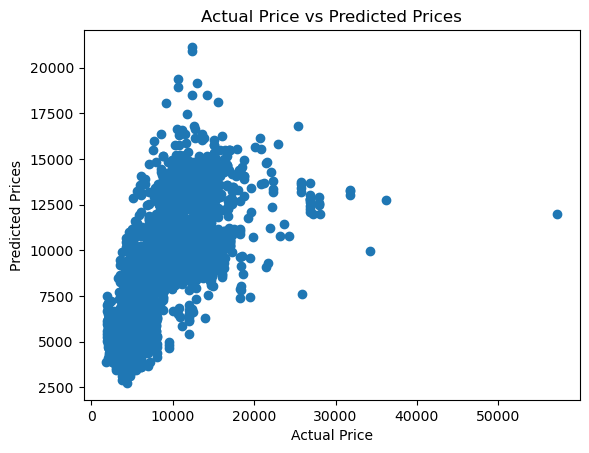

In [45]:
# Visualize the actual prices and predicted prices

plt.scatter(y_test, testing_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()